In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import numpy as np
import torch
import scanpy as sc
import muon as mu
import anndata
import mudata
import pandas as pd

print(anndata.__version__)
print(mudata.__version__)
print(sc.__version__)
print(torch.__version__)

0.8.0
0.2.1
1.9.2
1.11.0


In [3]:
%load_ext autoreload
%autoreload 2

In [17]:
from src.mvae.model import MVAE
from src.mvae.train import train_mvae
from src.mvae.diagnostics import plot_embedding, classification_performance
from src.types import TrainParams
from src.model import ModelParams

In [5]:
torch.manual_seed(2137)
np.random.seed(2137)

In [6]:
mdata = mu.read('/media/yob/nacho_stuff/prostate_cancer/Integration/MVAE-PoE/OtF-prostate/data/mdata_preprocessed_final_filtered.h5mu')
mdata

MuData object with n_obs × n_vars = 42475 × 31460
  obs:	'sample', 'tissue', 'patient', 'ann', 'imagerow', 'imagecol'
  2 modalities
    rna:	42475 x 18950
      obs:	'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'n_genes', 'size_factors', 'sample', 'type', 'patient', 'ann', 'tissue', 'imagerow', 'imagecol'
      obsm:	'spatial'
      layers:	'counts', 'scran_normalization', 'spotclean'
    msi:	42475 x 12510
      obs:	'ST_barcode', 'sample', 'tissue', 'patient', 'ann', 'imagerow', 'imagecol'
      obsm:	'spatial'

In [12]:
metadata = mu.read('/media/yob/nacho_stuff/prostate_cancer/Integration/MVAE-PoE/OtF-prostate/data/mdata_metadata.h5mu')
mdata.obs["new_ann"] = metadata.obs["new_ann"]
mdata.mod["msi"].obs["new_ann"] = metadata.obs["new_ann"]
mdata.mod["rna"].obs["new_ann"] = metadata.obs["new_ann"]

In [8]:
mvae_params = ModelParams(beta=0.01, n_layers=2, z_dim=100, n_hidden=300)

In [9]:
train_params = TrainParams(add_lisi_loss=False, train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="mvae_no_lisi")
torch.set_num_threads(16)
model = MVAE(mdata, mvae_params, use_cuda=True)

N batches for mod1:  16
N batches for mod2:  16
(42475, 18950)
(42475, 12510)


In [10]:
hist = train_mvae(model, mdata, train_params)

Train data size: 33980
Test data size: 8495


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:15<00:00,  3.51it/s]


EarlyStopping (epoch: 1): train loss improved to 0.05432465061712012


 99%|██████████████████████████████████████████████████████████████████████▉ | 66/67 [00:15<00:00,  4.14it/s]


EarlyStopping (epoch: 1): valid loss improved to 3.1742782665021494


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:09<00:00,  3.82it/s]


EarlyStopping (epoch: 2): train loss improved to 0.021568587901242837


 99%|██████████████████████████████████████████████████████████████████████▉ | 66/67 [00:15<00:00,  4.21it/s]


EarlyStopping (epoch: 2): valid loss improved to 2.4745915622422188


 99%|██████████████████████████████████████████████████████████████████████▉ | 66/67 [00:16<00:00,  4.01it/s]


EarlyStopping (epoch: 3): valid loss improved to 2.205229163169861


 99%|██████████████████████████████████████████████████████████████████████▉ | 66/67 [00:16<00:00,  4.02it/s]


EarlyStopping (epoch: 4): valid loss improved to 2.0649076682148557


 99%|██████████████████████████████████████████████████████████████████████▉ | 66/67 [00:16<00:00,  4.03it/s]


EarlyStopping (epoch: 5): valid loss improved to 1.9820526404814287


 99%|██████████████████████████████████████████████████████████████████████▉ | 66/67 [00:16<00:00,  3.97it/s]


EarlyStopping (epoch: 6): valid loss improved to 1.9101068305246758


 99%|██████████████████████████████████████████████████████████████████████▉ | 66/67 [00:15<00:00,  4.27it/s]


EarlyStopping (epoch: 7): valid loss improved to 1.8674488519177292


 99%|██████████████████████████████████████████████████████████████████████▉ | 66/67 [00:16<00:00,  3.99it/s]


EarlyStopping (epoch: 8): valid loss improved to 1.843091202504707


 99%|██████████████████████████████████████████████████████████████████████▉ | 66/67 [00:16<00:00,  3.88it/s]


EarlyStopping (epoch: 9): valid loss improved to 1.8208452679894187


 99%|██████████████████████████████████████████████████████████████████████▉ | 66/67 [00:16<00:00,  4.04it/s]


EarlyStopping (epoch: 10): valid loss improved to 1.795120732350783


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:07<00:00,  3.91it/s]


EarlyStopping (epoch: 12): train loss hasn't improved: 0.014377047799488177. Stopping.


 99%|██████████████████████████████████████████████████████████████████████▉ | 66/67 [00:17<00:00,  3.87it/s]


EarlyStopping (epoch: 12): valid loss improved to 1.7781158125761785


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:08<00:00,  3.87it/s]


EarlyStopping (epoch: 13): train loss hasn't improved: 0.014277015800964419. Stopping.


 99%|██████████████████████████████████████████████████████████████████████▉ | 66/67 [00:16<00:00,  4.04it/s]


EarlyStopping (epoch: 13): valid loss improved to 1.7664058100093494


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:11<00:00,  3.73it/s]


EarlyStopping (epoch: 14): train loss hasn't improved: 0.014224969909217794. Stopping.


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:08<00:00,  3.84it/s]


EarlyStopping (epoch: 15): train loss hasn't improved: 0.014135828423036977. Stopping.


 99%|██████████████████████████████████████████████████████████████████████▉ | 66/67 [00:16<00:00,  3.93it/s]


EarlyStopping (epoch: 15): valid loss improved to 1.748604568568143


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:10<00:00,  3.74it/s]


EarlyStopping (epoch: 16): train loss hasn't improved: 0.014090904710993057. Stopping.


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:08<00:00,  3.84it/s]


EarlyStopping (epoch: 17): train loss hasn't improved: 0.0140645594334448. Stopping.


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:09<00:00,  3.80it/s]


EarlyStopping (epoch: 18): train loss hasn't improved: 0.014019236784250754. Stopping.


 99%|██████████████████████████████████████████████████████████████████████▉ | 66/67 [00:17<00:00,  3.87it/s]


EarlyStopping (epoch: 18): valid loss improved to 1.7342255169695073


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:09<00:00,  3.82it/s]


EarlyStopping (epoch: 19): train loss hasn't improved: 0.014018207690237268. Stopping.


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:10<00:00,  3.77it/s]


EarlyStopping (epoch: 20): train loss hasn't improved: 0.013927590141863315. Stopping.


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:10<00:00,  3.75it/s]


EarlyStopping (epoch: 21): train loss hasn't improved: 0.013948898665549967. Stopping.


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:11<00:00,  3.73it/s]


EarlyStopping (epoch: 22): train loss hasn't improved: 0.013919653490475166. Stopping.


 99%|██████████████████████████████████████████████████████████████████████▉ | 66/67 [00:16<00:00,  4.05it/s]


EarlyStopping (epoch: 22): valid loss improved to 1.7229693748734214


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:08<00:00,  3.85it/s]


EarlyStopping (epoch: 23): train loss hasn't improved: 0.013901197875226645. Stopping.


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:11<00:00,  3.73it/s]


EarlyStopping (epoch: 24): train loss hasn't improved: 0.013862849562360372. Stopping.


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:08<00:00,  3.85it/s]


EarlyStopping (epoch: 25): train loss hasn't improved: 0.013881805996953775. Stopping.


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:09<00:00,  3.82it/s]


EarlyStopping (epoch: 26): train loss hasn't improved: 0.013844572413732473. Stopping.


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:09<00:00,  3.80it/s]


EarlyStopping (epoch: 27): train loss hasn't improved: 0.013846121208326756. Stopping.


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:08<00:00,  3.85it/s]


EarlyStopping (epoch: 28): train loss hasn't improved: 0.013825497218901582. Stopping.


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:16<00:00,  3.48it/s]


EarlyStopping (epoch: 29): train loss hasn't improved: 0.013809585206434263. Stopping.


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:10<00:00,  3.74it/s]


EarlyStopping (epoch: 30): train loss hasn't improved: 0.013777335841491547. Stopping.


 99%|██████████████████████████████████████████████████████████████████████▉ | 66/67 [00:15<00:00,  4.22it/s]


EarlyStopping (epoch: 30): valid loss improved to 1.7062957973191233


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:09<00:00,  3.82it/s]


EarlyStopping (epoch: 31): train loss hasn't improved: 0.01378817361828297. Stopping.


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:09<00:00,  3.80it/s]


EarlyStopping (epoch: 32): train loss hasn't improved: 0.013775136735314409. Stopping.


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:09<00:00,  3.79it/s]


EarlyStopping (epoch: 33): train loss hasn't improved: 0.013780297908171125. Stopping.


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:08<00:00,  3.89it/s]


EarlyStopping (epoch: 34): train loss hasn't improved: 0.013774248569975747. Stopping.


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:10<00:00,  3.76it/s]


EarlyStopping (epoch: 35): train loss hasn't improved: 0.013753808074449356. Stopping.


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:09<00:00,  3.81it/s]


EarlyStopping (epoch: 36): train loss hasn't improved: 0.013741782372526873. Stopping.


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:08<00:00,  3.88it/s]


EarlyStopping (epoch: 37): train loss hasn't improved: 0.013767586759850164. Stopping.


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:07<00:00,  3.95it/s]


EarlyStopping (epoch: 38): train loss hasn't improved: 0.013741584754537456. Stopping.


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:07<00:00,  3.93it/s]


EarlyStopping (epoch: 39): train loss hasn't improved: 0.013746775420993269. Stopping.


100%|█████████████████████████████████████████████████████████████████████▋| 265/266 [01:07<00:00,  3.93it/s]


EarlyStopping (epoch: 40): train loss hasn't improved: 0.013746675496384843. Stopping.


 99%|██████████████████████████████████████████████████████████████████████▉ | 66/67 [00:16<00:00,  4.09it/s]


EarlyStopping (epoch: 40): valid loss hasn't improved: 1.703678512212002. Stopping.


100%|██████████████████████████████████████████████████████████████████████| 332/332 [00:29<00:00, 11.29it/s]
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


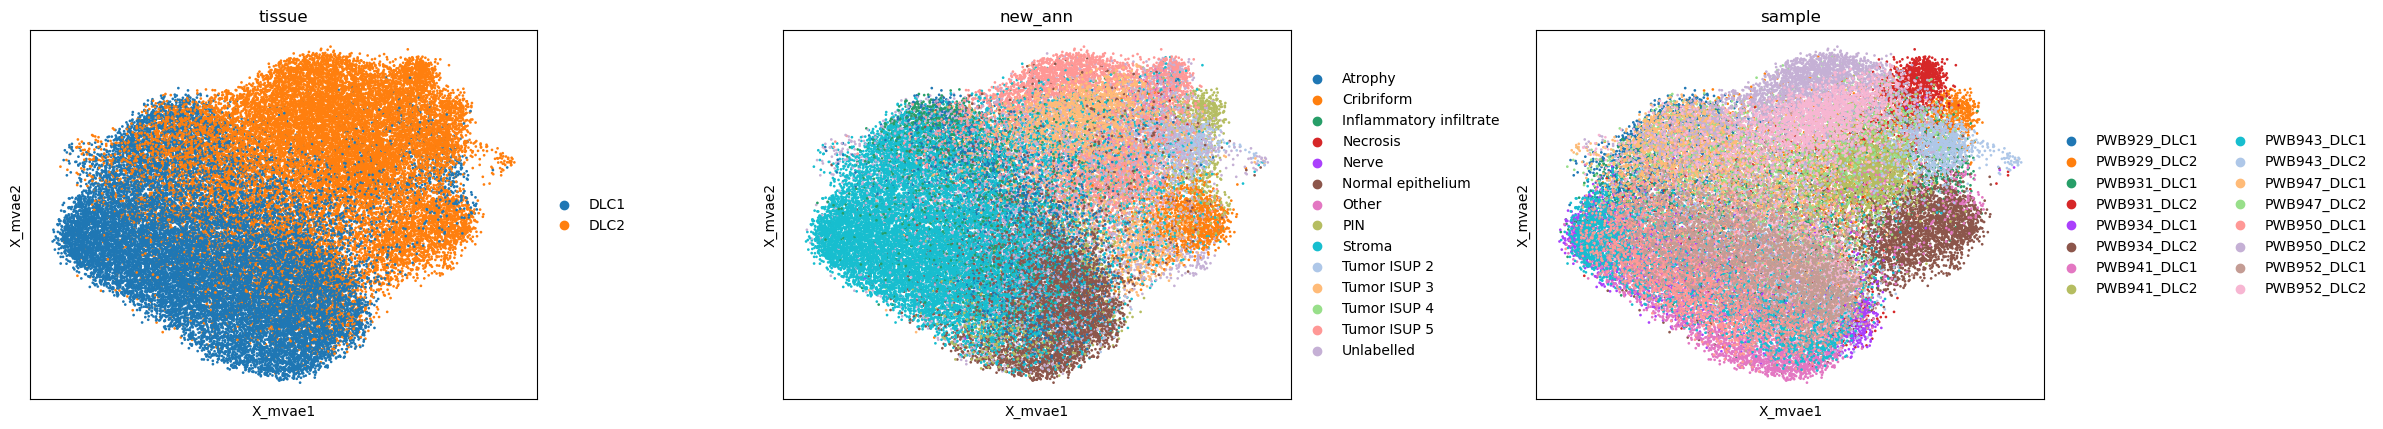

In [14]:
plot_embedding(model, mdata, train_params=train_params, poe_only=False)

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


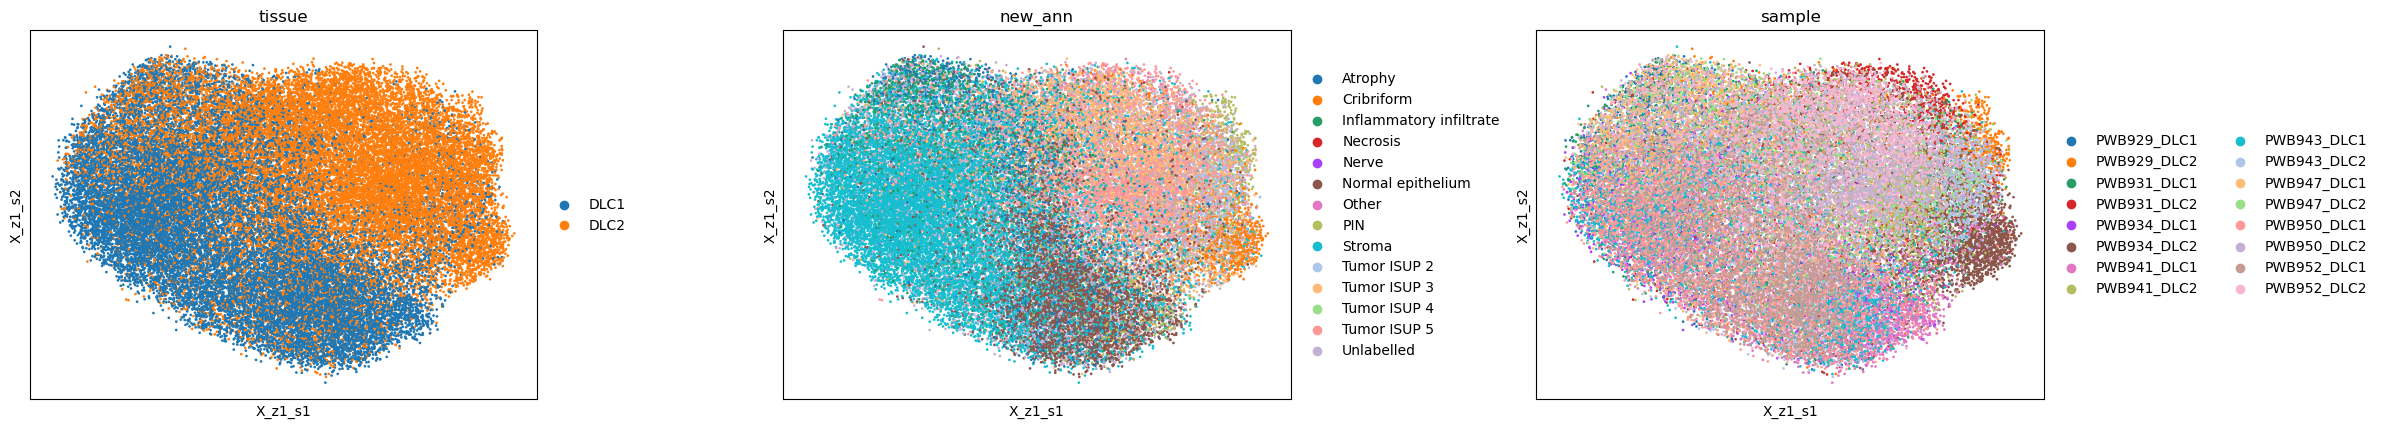

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


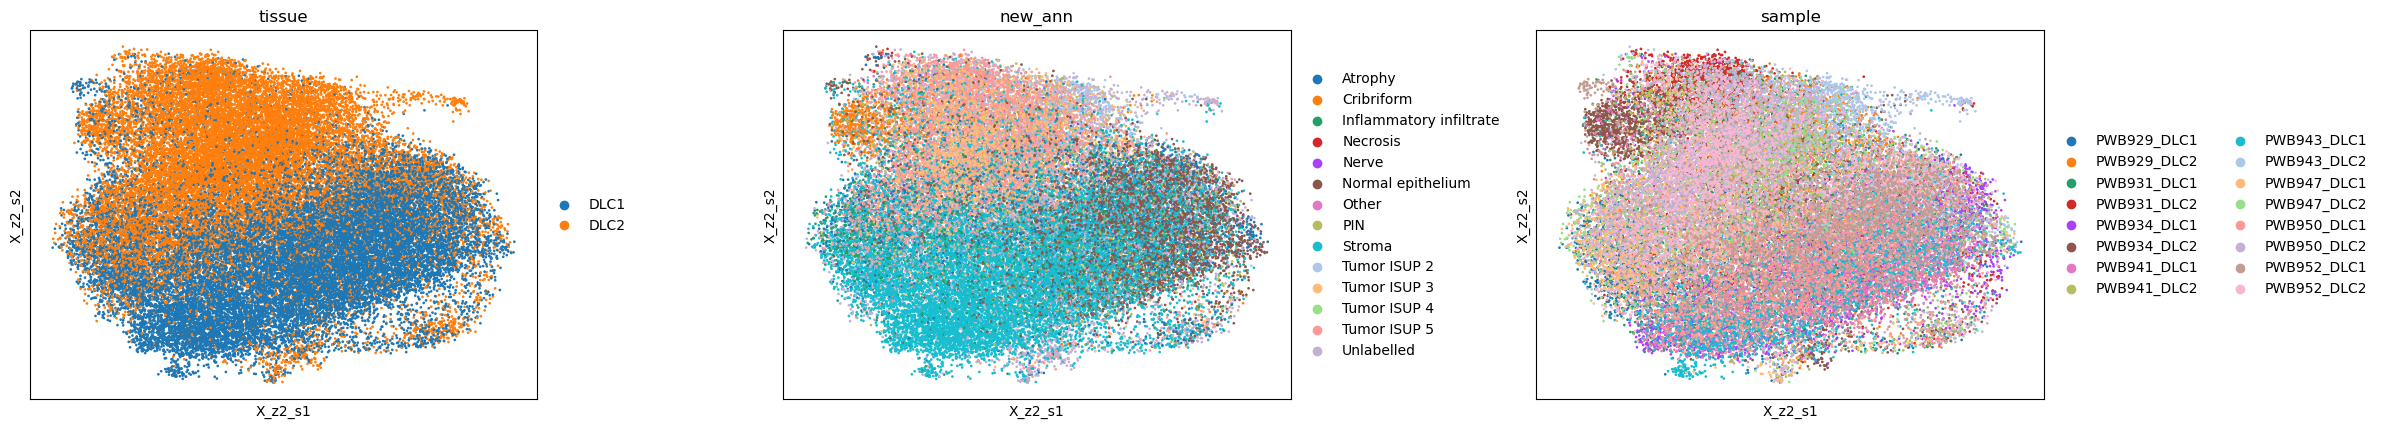

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


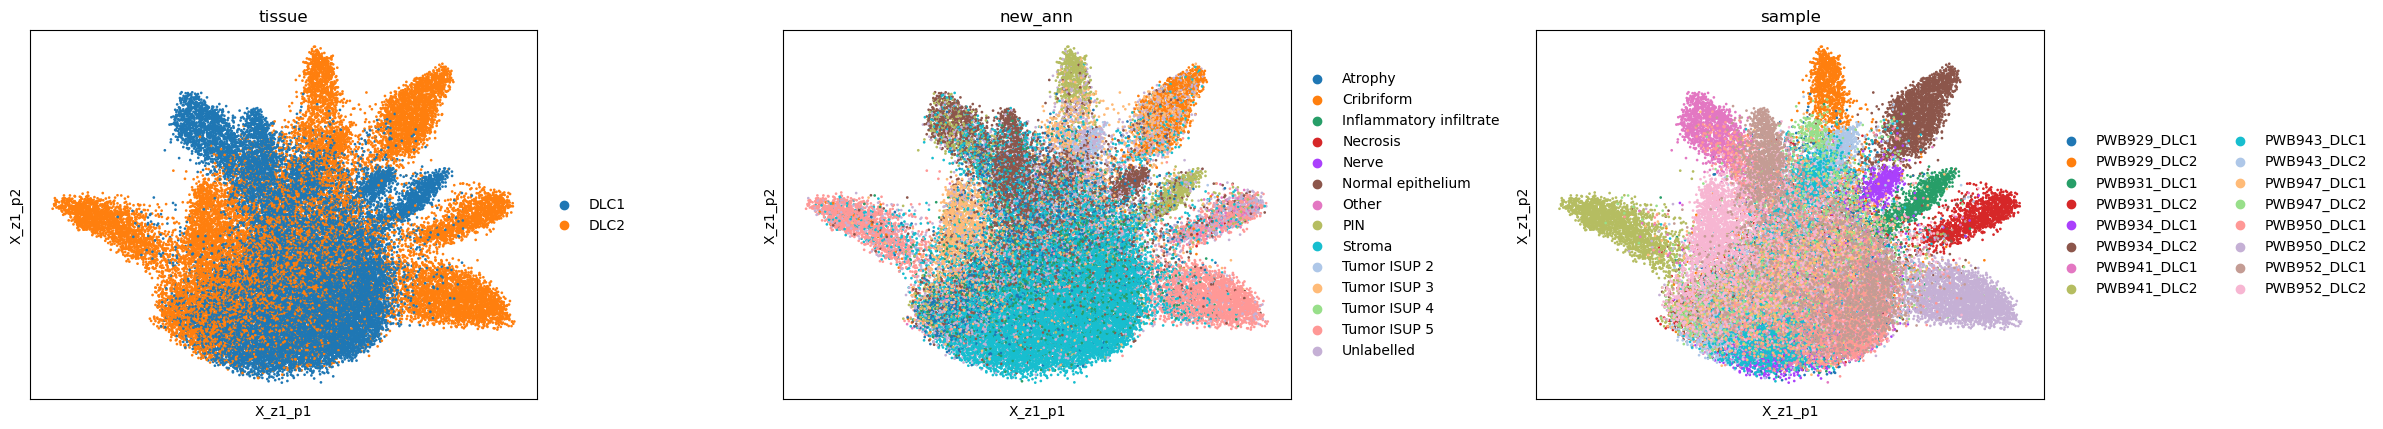

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


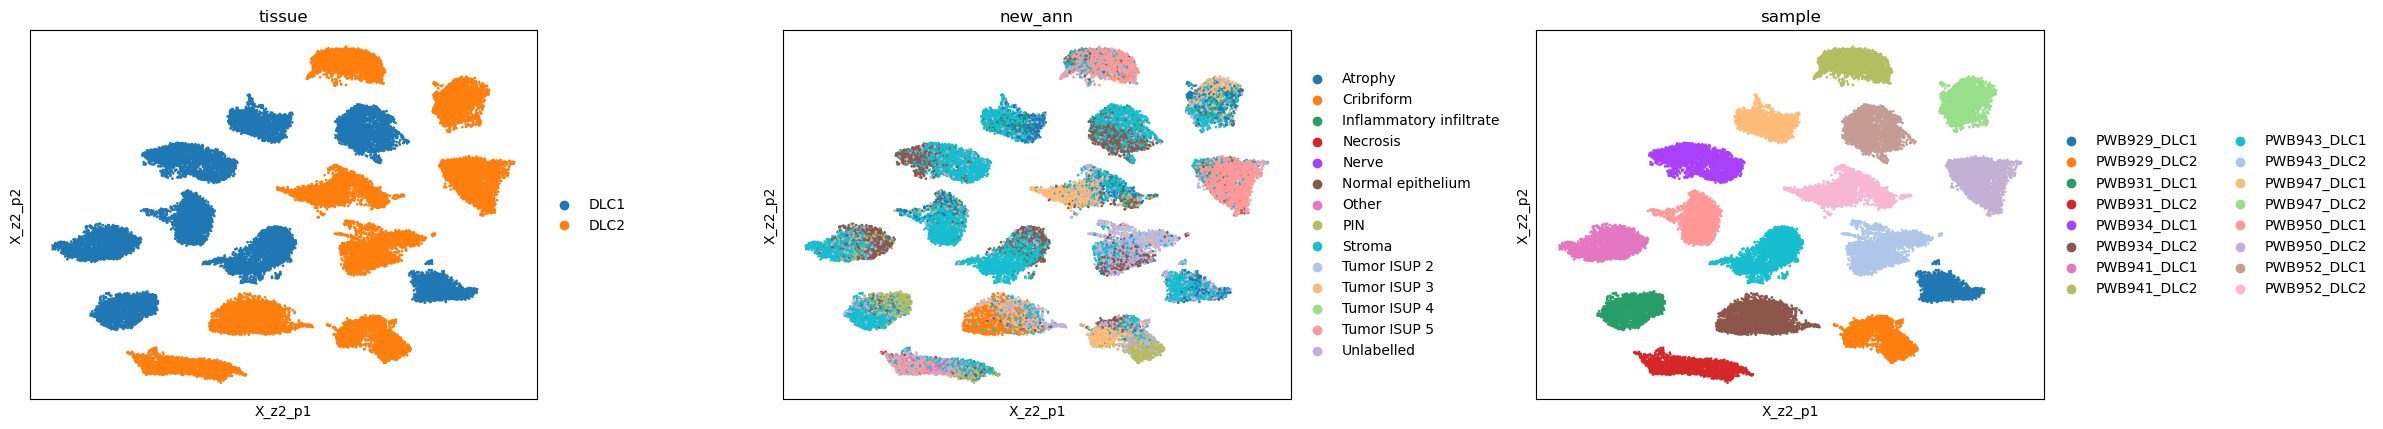

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


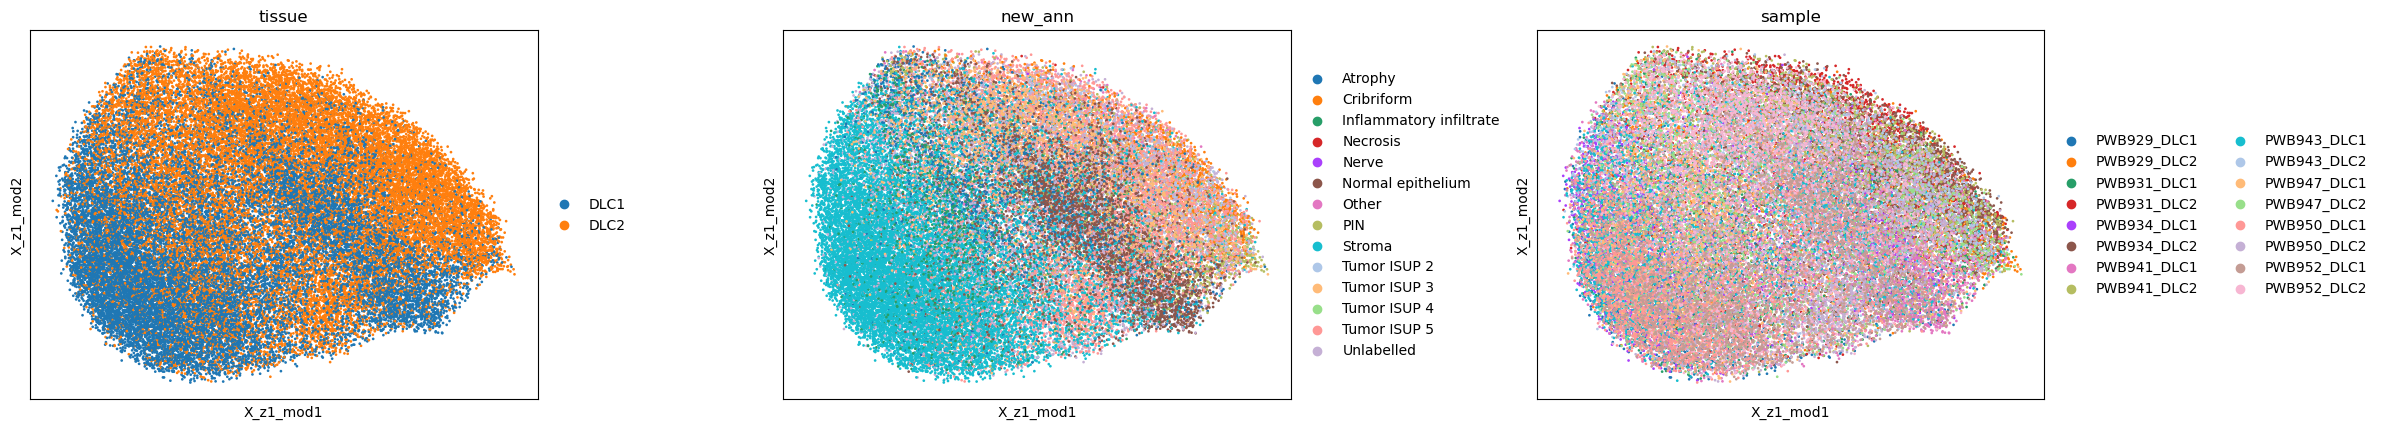

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


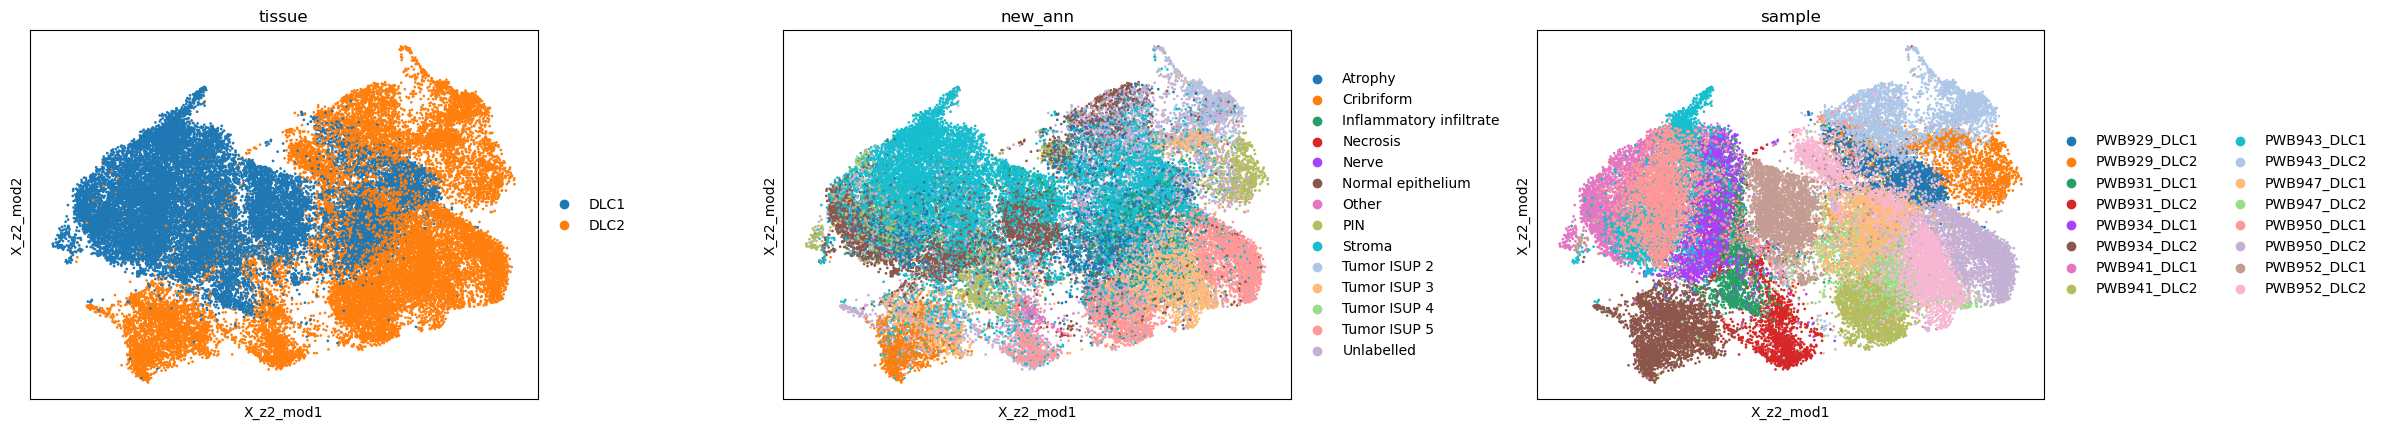

In [16]:
for layer in ["z1_s", "z2_s", "z1_p", "z2_p", "z1_mod", "z2_mod"]:
    sc.pl.embedding(
        mdata,
        f"X_{layer}",
        color=["tissue", "new_ann", "sample"],
        size=15,
        wspace=0.35,
    )

In [18]:
class_perf = {}
for sample in mdata.obs["sample"].unique():
    class_perf[sample] = classification_performance(mdata, loo=sample, label_key="new_ann")[0]
class_perf

{'PWB929_DLC2': 0.1863013698630137,
 'PWB929_DLC1': 0.5236625514403292,
 'PWB931_DLC2': 0.3166214995483288,
 'PWB931_DLC1': 0.41609756097560974,
 'PWB934_DLC2': 0.09594460929772503,
 'PWB934_DLC1': 0.7129228100607112,
 'PWB941_DLC2': 0.10592734225621415,
 'PWB941_DLC1': 0.5748288229540267,
 'PWB943_DLC2': 0.22537562604340566,
 'PWB943_DLC1': 0.6890302066772656,
 'PWB947_DLC2': 0.2785276073619632,
 'PWB947_DLC1': 0.44192634560906513,
 'PWB950_DLC2': 0.08961038961038961,
 'PWB950_DLC1': 0.6539842067480258,
 'PWB952_DLC2': 0.2157586949830717,
 'PWB952_DLC1': 0.535328924469196}